# range di un elettrone in un materiale

Si supponga che un fascio di elettroni identici con energia E colpisca un blocco di materiale, all'interno del quale il loro cammino libero, cio\`e la distanza percorsa fra un'interazione e l'altra, sia distribuito in modo esponenziale con valore medio $\Delta{}x$. 
Si vuole determinare la distribuzione della profondit\`a raggiunta dagli elettroni assumendo le seguenti ipotesi:
- la direzione di moto degli elettroni non cambia a ogni urto
- l'energia persa da ogni elettrone a ogni urto \`e proporzionale al cammino percorso e all'energia dell'elettrone
- quando l'energia totale di un elettrone raggiunge lo zero durante un tratto di cammino libero, esso non arriva a destinazione

In [1]:
# python library imports

import random
import numpy as np
import matplotlib.pyplot as plt
import lib, stats
from math import floor, ceil

In [2]:
# variables of the problem

Dx_ele   = 1e-3  # cammino libero medio (cm)
E_ele    = 1     # energia iniziale (MeV)

N_ele    = 10_000


Text(0.5, 0, 'dE/dx (MeV/cm)')

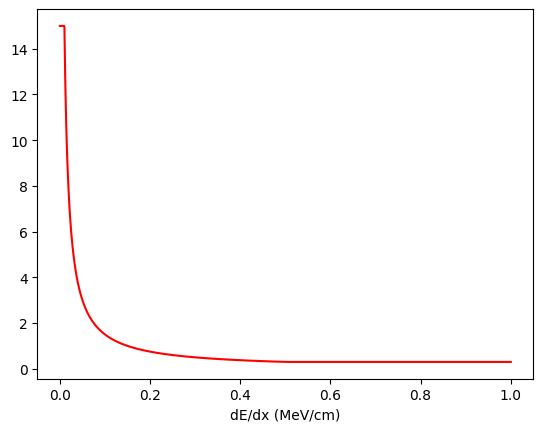

In [18]:
fig, ax = plt.subplots (nrows = 1, ncols = 1)
x_coord = np.linspace (0, 1, 1000)
y_coord = [lib.dEdx (x) for x in x_coord]

ax.plot (x_coord, y_coord,
         color = 'red',
        )
ax.set_xlabel ('energia (MeV)')
ax.set_xlabel ('dE/dx (MeV/cm)')

## Punto 1

Si utilizzi il metodo della funzione inversa per generare una distribuzione casuale esponenziale del cammino libero per ogni elettrone e se ne disegni l'istogramma con 10,000 eventi

Text(0.5, 0, 'lunghezza di un passo (cm)')

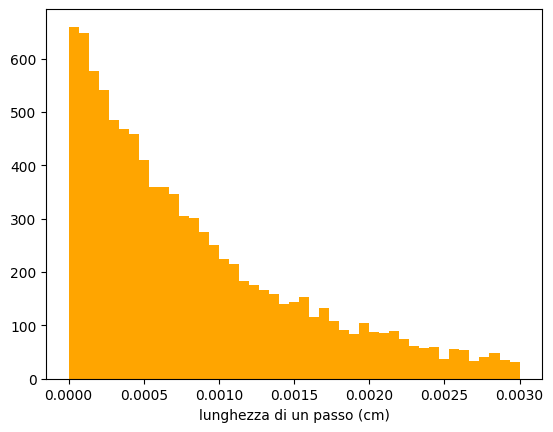

In [3]:
sample = []
N_tot = 10_000
for i in range (N_tot):
    sample.append (lib.inv_exp (random.random (), 1./Dx_ele))

bin_edges = np.linspace (0., 3 * Dx_ele, lib.sturges_c (sample))
fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (sample,
         bins = bin_edges,
         color = 'orange',
        )
ax.set_xlabel ('lunghezza di un passo (cm)')

## Punto 2

Preso un singolo elettrone, si determini la lunghezza del suo percorso fino all'arresto in un materiale di lunghezza infinita, utilizzando un ciclo che generi il libero cammino dopo ogni urto, assumendo le ipotesi enunciate nell'incipit del problema. Si stampi a schermo il risultato, possibilmente scegliendo un numero di cifre significative che permetta di apprezzare le fluttuazioni statistiche intrinseche del problema.

In [4]:
E_rimasta = E_ele
percorso = 0.

while E_rimasta > 0 :
    delta_x = lib.inv_exp (random.random (), 1./Dx_ele)
    delta_E = delta_x * lib.dEdx (E_rimasta)
    E_rimasta -= delta_E
    if E_rimasta > 0 : percorso += delta_x

print (f'lunghezza percorsa: {percorso:.5f} cm')

lunghezza percorsa: 2.50340 cm


# Punto 3

Si contruisca l'istogramma della distribuzione del cammino percorso dagli elettroni, se ne disegni l'istogramma e se ne determinino media, sigma, asimmetria e curtosi, simulando 10,000 elettroni.

In [5]:
percorsi = []
percorsi_1 = []

for e in range (N_ele):
    E_rimasta = E_ele
    percorso = 0.
    percorso_1 = 0.
    
    while E_rimasta > 0 :
        delta_x = lib.inv_exp (random.random (), 1./Dx_ele)
        delta_E = delta_x * lib.dEdx (E_rimasta)
        E_rimasta -= delta_E
        percorso_1 += delta_x
        if E_rimasta > 0 : percorso += delta_x    
    
    percorsi.append (percorso)
    percorsi_1.append (percorso_1)


Text(0.5, 0, 'profondità (cm)')

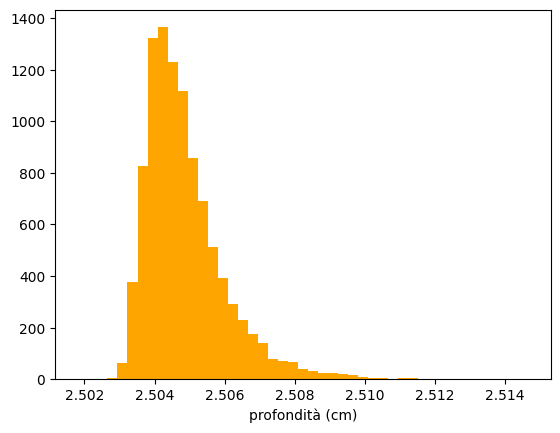

In [6]:
massimo = np.max (percorsi_1)
minimo  = np.min (percorsi_1)
delta   = massimo - minimo

bin_edges = np.linspace (minimo - 0.1 * delta, massimo + 0.1 * delta, lib.sturges_c (percorsi_1))
fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (percorsi_1,
         bins = bin_edges,
         color = 'orange',
        )
ax.set_xlabel ('profondità (cm)')

Text(0.5, 0, 'profondità (cm)')

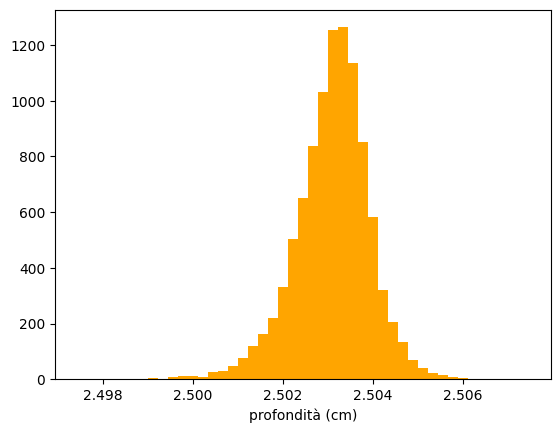

In [7]:

massimo = np.max (percorsi)
minimo  = np.min (percorsi)
delta   = massimo - minimo

bin_edges = np.linspace (minimo - 0.1 * delta, massimo + 0.1 * delta, lib.sturges_c (percorsi))
fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (percorsi,
         bins = bin_edges,
         color = 'orange',
        )
ax.set_xlabel ('profondità (cm)')

In [8]:
stat_calc = stats.stats (percorsi)
print ('media = ', stat_calc.mean ())
print ('sigma = ', stat_calc.sigma ())
print ('asimm = ', stat_calc.skewness ())
print ('curt  = ', stat_calc.kurtosis ())


media =  2.5030954728267854
sigma =  0.0008265098605335353
asimm =  -0.4985549260796339
curt  =  1.5468336688177322


# Punto 4

Nel caso in cui il materiale sia spesso $\mu$ si calcoli la frazione di particelle che sopravvivono al suo attraversamento e se ne disegni la distribuzione dell'energia residua.

In [9]:
spessore = stat_calc.mean ()

energie = []

for e in range (N_ele):
    E_rimasta = E_ele
    percorso = 0
    
    while E_rimasta > 0 and percorso < spessore :
        delta_x = lib.inv_exp (random.random (), 1./Dx_ele)
        percorso += delta_x
        delta_E = delta_x * lib.dEdx (E_rimasta)
        E_rimasta -= delta_E

    if (E_rimasta > 0) :
        energie.append (E_rimasta)

print ('frazione di elettroni che sopravvivono: ', len (energie) / N_ele)

frazione di elettroni che sopravvivono:  0.5279


Text(0.5, 0, 'energia (MeV)')

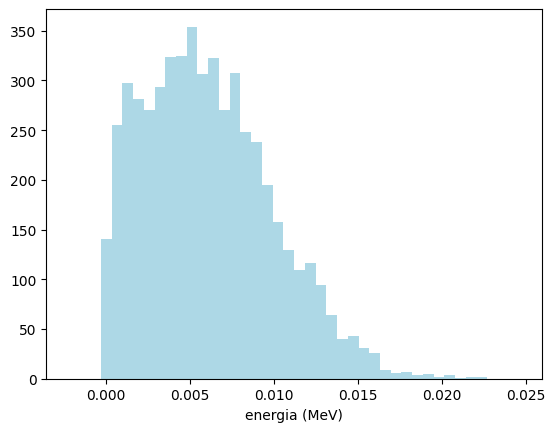

In [10]:
massimo_E = np.max (energie)
minimo_E  = np.min (energie)
delta_E   = massimo_E - minimo_E

bin_edges_E = np.linspace (minimo_E - 0.1 * delta_E, massimo_E + 0.1 * delta_E, lib.sturges_c (energie))
fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (energie,
         bins = bin_edges_E,
         color = 'lightblue',
        )
ax.set_xlabel ('energia (MeV)')

Assumendo che l'energia venga persa da ogni elettrone nel punto medio di ogni tratto di cammino libero, si costruisca un grafico che mostra la quantità totale di energia rilasciata nel materiale per unit\`a di lunghezza dagli elettroni in funzione della profondit\`a, scegliendo un'opportuna suddivisione in bin dello spazio percorso dalle particelle e si disegni il profilo di energia depositata cos\`i ottenuto.

In [15]:
# get the bin size of point 3
bin_width = 10 * (bin_edges[1] - bin_edges[0])

N_bins = ceil ((massimo + 0.5 * delta) / bin_width)
energy_deposit = np.zeros (N_bins)

print (massimo + 0.1 * delta, bin_width)

N_elettroni = 100

for e in range (N_elettroni):
    E_rimasta = E_ele
    percorso = 0.
    
    while E_rimasta > 0 :
        delta_x = lib.inv_exp (random.random (), 1./Dx_ele)
        delta_E = delta_x * lib.dEdx (E_rimasta)
        E_rimasta -= delta_E
        if E_rimasta > 0 : 
            percorso += delta_x
            position_bin = floor ((percorso + 0.5 * delta_x) / bin_width)
            energy_deposit[position_bin] += delta_E

energy_deposit /= N_elettroni * bin_width


2.507449348663031 0.0022262166525699456


Text(0, 0.5, 'energia depositata per unità di lunghezza (MeV/cm)')

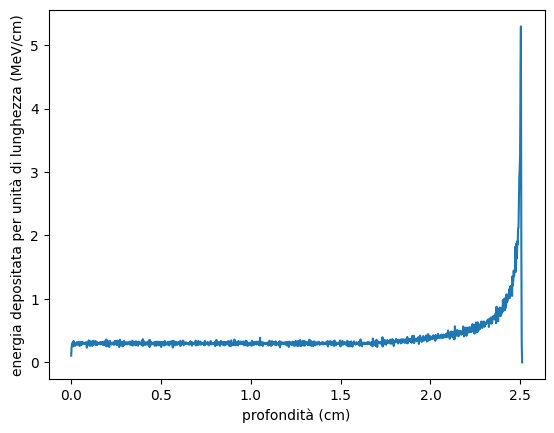

In [16]:
positions = np.zeros (N_bins)
for i in range (len (positions)):
    positions[i] = 0.5 * bin_width + bin_width * i

fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.plot (positions, energy_deposit)
ax.set_xlabel ('profondità (cm)')
ax.set_ylabel ('energia depositata per unità di lunghezza (MeV/cm)')